<a href="https://colab.research.google.com/github/showpiecep/ML_labs/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/archive.zip
!rm /content/archive.zip

Archive:  /content/archive.zip
  inflating: glass.csv               


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('glass.csv')
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
from sklearn import preprocessing
data = preprocessing.minmax_scale(data)

In [4]:
set(labels), var_names

({1, 2, 3, 5, 6, 7},
 ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])

In [5]:
len(labels), data.shape

(214, (214, 9))

In [6]:
data

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

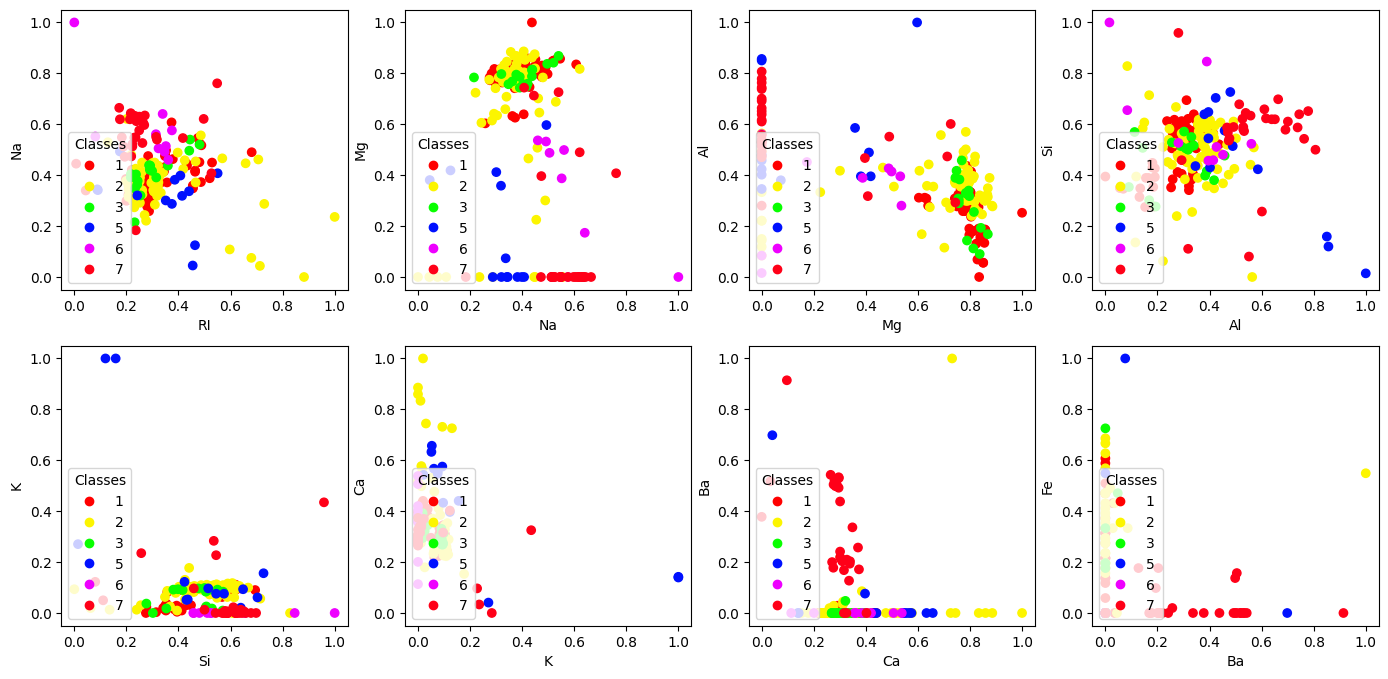

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 4, figsize=(17, 8))
for i in range(data.shape[1]-1):
    points = axs[i // 4, i % 4].scatter(data[:,i],data[:,(i+1)],c=labels,cmap='hsv', label=labels)
    legend1 = axs[i // 4, i % 4].legend(*points.legend_elements(),
                    loc="lower left", title="Classes")
    
    axs[i // 4, i % 4].set_xlabel(var_names[i])
    axs[i // 4, i % 4].set_ylabel(var_names[i+1])


plt.show()

In [8]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components = 2)
pca_data_2 = pca_2.fit(data).transform(data)


In [9]:
print(pca_2.explained_variance_ratio_)
print(pca_2.singular_values_)


[0.45429569 0.17990097]
[5.1049308  3.21245688]


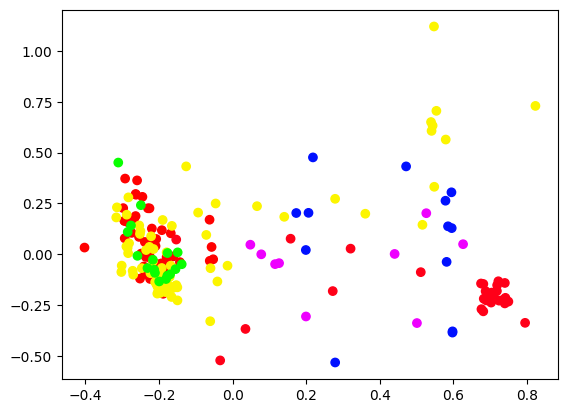

In [10]:
plt.scatter(pca_data_2[:,0], pca_data_2[:,1], c=labels, cmap='hsv')
plt.show()

Проанализируйте и обоснуйте полученные результаты.
 
Используя метод главных компонент, отбрасывется "не сильно важная" часть информации ради уменьшения размерности данных. 

In [11]:
pca = PCA(n_components=4)
pca_data = pca.fit(data).transform(data)

print(sum(pca.explained_variance_ratio_))

0.8586697305102716


При 4 компонентах объясняют не менее 85% дисперсии данных


In [12]:
pca = pca.inverse_transform(pca_data)
pca_2 = pca_2.inverse_transform(pca_data_2)

In [13]:
print("Используя MSE сравниваем различие между восстановленными данными и начальными")
difference_n4 = sum(sum((data - pca)**2))
difference_n2 = sum(sum((data - pca_2)**2))
print(difference_n4, difference_n2)
print(difference_n4 < difference_n2)
print("При не менее 85% диспресии данных восстановление данных прошло успешнее")

Используя MSE сравниваем различие между восстановленными данными и начальными
8.107300858010406 20.98402363409205
True
При не менее 85% диспресии данных восстановление данных прошло успешнее


In [14]:
parameters = ('auto', 'full', 'arpack', 'randomized')
for parameter in parameters:
    print(f'Параметр: {parameter}')
    pca = PCA(n_components=4, svd_solver=parameter)
    pca_data_new = pca.fit(data).transform(data)
    pca_inv = pca.inverse_transform(pca_data_new)
    print(sum(sum((data - pca_inv)**2)))
    print('*' * 50)

Параметр: auto
8.107300858010406
**************************************************
Параметр: full
8.107300858010406
**************************************************
Параметр: arpack
8.107300858010406
**************************************************
Параметр: randomized
8.107300858010404
**************************************************


In [15]:
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=2)
kernel_pca_data = kernel_pca.fit(data).transform(data)

print(sum(sum((pca_data_2 - kernel_pca_data)**2)))
print("Сравнение kernel_pca_data с pca_data_2 через MSE")

2.4457194039483166e-29
Сравнение kernel_pca_data с pca_data_2 через MSE


In [16]:
parameters = ('linear', 'poly', 'rbf', 'sigmoid', 'cosine')

for parameter in parameters:
    print(f'Параметр: {parameter}')
    kernel_pca = KernelPCA(n_components=4, kernel=parameter)
    kernel_pca_data = kernel_pca.fit(data).transform(data)
    print(sum(sum((pca_data - kernel_pca_data)**2)))
    print('*' * 50)

Параметр: linear
4.897035146144282e-29
**************************************************
Параметр: poly
6.142631668254265
**************************************************
Параметр: rbf
15.000681870624183
**************************************************
Параметр: sigmoid
31.84010528063432
**************************************************
Параметр: cosine
2.1883303695141523
**************************************************


При параметрах n_components=4 и kernel=linear KernelPCA работает также как PCA, т.к. получили очень маленькую ошибку

In [17]:
from sklearn.decomposition import SparsePCA

sparse_pca = SparsePCA(n_components=2, alpha=1)
sparse_pca_data = sparse_pca.fit(data).transform(data)
print(sum(sum((pca_data_2 - sparse_pca_data)**2)))
print("Сравнение sparse_pca_data с pca_data_2 через MSE")

8.822342139104745
Сравнение sparse_pca_data с pca_data_2 через MSE


In [18]:
parameters = ('lars', 'cd')

for parameter in parameters:
    print(f'Параметр: {parameter}')
    sparse_pca = SparsePCA(n_components=4, alpha=0.01, method=parameter)
    sparse_pca_data = sparse_pca.fit(data).transform(data)
    print(sum(sum((pca_data - sparse_pca_data)**2)))
    print('*' * 50)

Параметр: lars
5.709906458511806
**************************************************
Параметр: cd
5.709632895745361
**************************************************


0.003566336406665797


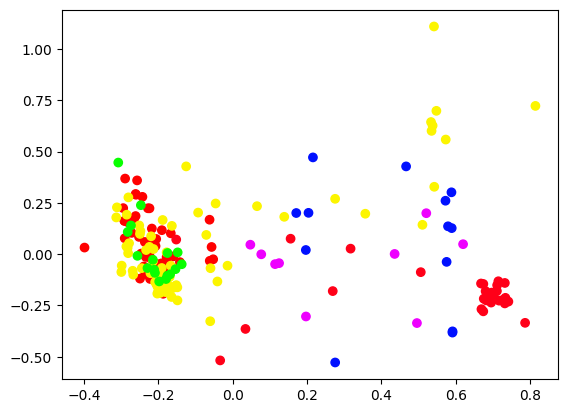

In [21]:
sparse_pca = SparsePCA(n_components=2, alpha=0)
sparse_pca_data = sparse_pca.fit(data).transform(data)
print(sum(sum((pca_data_2 - sparse_pca_data)**2)))

plt.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=labels, cmap='hsv')
plt.show()

При параметрах n_components=2 и alpha=0 SparsePCA работает также как PCA, т.к. именно при этих значениях получаем минамильное значение ошибки. alpha=0 говорит о том, что мы не используем L1 регуляризацию

При использовании линейного ядра в KernelPCA и отсутствии L1-регуляризации в SparcePCA эти методы работают также как обычный PCA. Это связано с тем, что линейное ядро в KernelPCA эквивалентно линейной комбинации исходных переменных в PCA, а отсутствие L1-регуляризации в SparcePCA означает, что все исходные переменные имеют одинаковый вес при вычислении главных компонент, как и в обычном PCA. Однако, при использовании других ядер в KernelPCA и наличии L1-регуляризации в SparcePCA результаты могут значительно отличаться от обычного PCA, что может быть полезным для решения определенных задач.

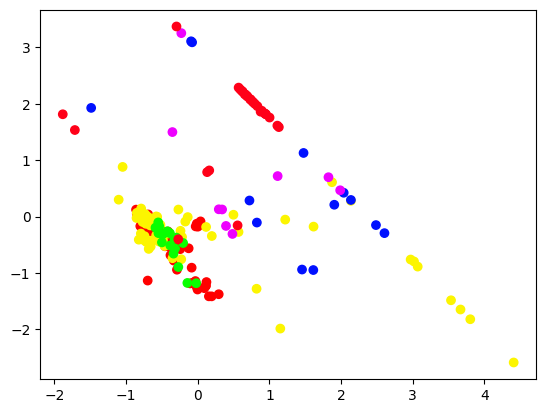

In [20]:
from sklearn.decomposition import FactorAnalysis
pca = FactorAnalysis(n_components = 2)
pca_data = pca.fit(data).transform(data)
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.show()

Метод главных компонент (PCA) и факторный анализ (FA) являются методами снижения размерности данных, но они имеют различия в своих подходах и целях.

> PCA - это метод, который используется для нахождения новых переменных (главных компонент) из исходных переменных, которые объясняют большую часть дисперсии данных. Он используется для уменьшения размерности данных, сохраняя при этом максимально возможное количество информации. Главные компоненты вычисляются путем линейной комбинации исходных переменных, где каждая компонента является линейной комбинацией всех исходных переменных.


> FA - это метод, который используется для идентификации скрытых факторов, которые объясняют наблюдаемые корреляции между исходными переменными. Факторы могут быть интерпретированы как скрытые переменные, которые объясняют связи между исходными переменными. FA используется для поиска скрытых факторов, которые могут помочь в объяснении сложных зависимостей между переменными.

Таким образом, PCA используется для уменьшения размерности данных, сохраняя при этом максимально возможное количество информации, а FA используется для идентификации скрытых факторов, которые объясняют наблюдаемые корреляции между исходными переменными.